<a href="https://colab.research.google.com/github/rahulrajbo/Supervised-Model/blob/main/House_Price_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name- House Price Prediction ML Project**

**Goal of the Project** -

Predict the price of a house by its features such as Size of the house, number of rooms, location of the house, age of the house, number of the floors and type of the house, etc.

If you are a buyer or seller of the house but you don’t know the exact price of the house, so supervised machine learning regression algorithms can help you to predict the price of the house just providing features of the target house.

# **About the Dataset**

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

# **Import Libraries**

In [192]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Supervised Model/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Supervised Model/house-prices-advanced-regression-techniques/test.csv')

In [4]:
print('shape of train dataset', train_df.shape)
print('shape of test dataset', test_df.shape)

shape of train dataset (1460, 81)
shape of test dataset (1459, 80)


In [5]:
# To see all the data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# **Data Preprocessing**

# **1- Data Integration**

In [8]:
df = pd.concat([train_df, test_df])
print('shape of data ', df.shape)

shape of data  (2919, 81)


In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


**Information of the dataset**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

'Alley', 'FireplaceQu', 'PoolQC', 'Fence', and 'MiscFeature' has lots of  null values.

So they are not much of use to us so, later we can drop them.

**Discrete, continuous and Categorical features**

In [12]:
no_col = df._get_numeric_data().columns
categorical = [x for x in df.columns if x not in no_col]
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
discrete = [x for x in no_col if len(df[x].unique()) <= 10]
discrete

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold']

In [14]:
continuous = [x for x in no_col if x not in discrete]
continuous

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

**Integer features**

In [15]:
int_features = df.select_dtypes(include= ['int64']).columns
print('Total number of interger features are: ', int_features.shape[0], '\n')
print('Integer features names: \n', int_features.tolist())

Total number of interger features are:  26 

Integer features names: 
 ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


**float features**

In [16]:
float_features = df.select_dtypes(include= ['float64']).columns
print('Total number of float features are: ', float_features.shape[0], '\n')
print('Float features names: \n', float_features.tolist())

Total number of float features are:  12 

Float features names: 
 ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


**object features**

In [17]:
categorical_features = df.select_dtypes(include= ['object']).columns
print('Total number of categorical features are: ', categorical_features.shape[0], '\n')
print('Categorical features names: \n', categorical_features.tolist())

Total number of categorical features are:  43 

Categorical features names: 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


**Get Statistical Information of Numerical Features**

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


# **2- NUll values Heat Map**

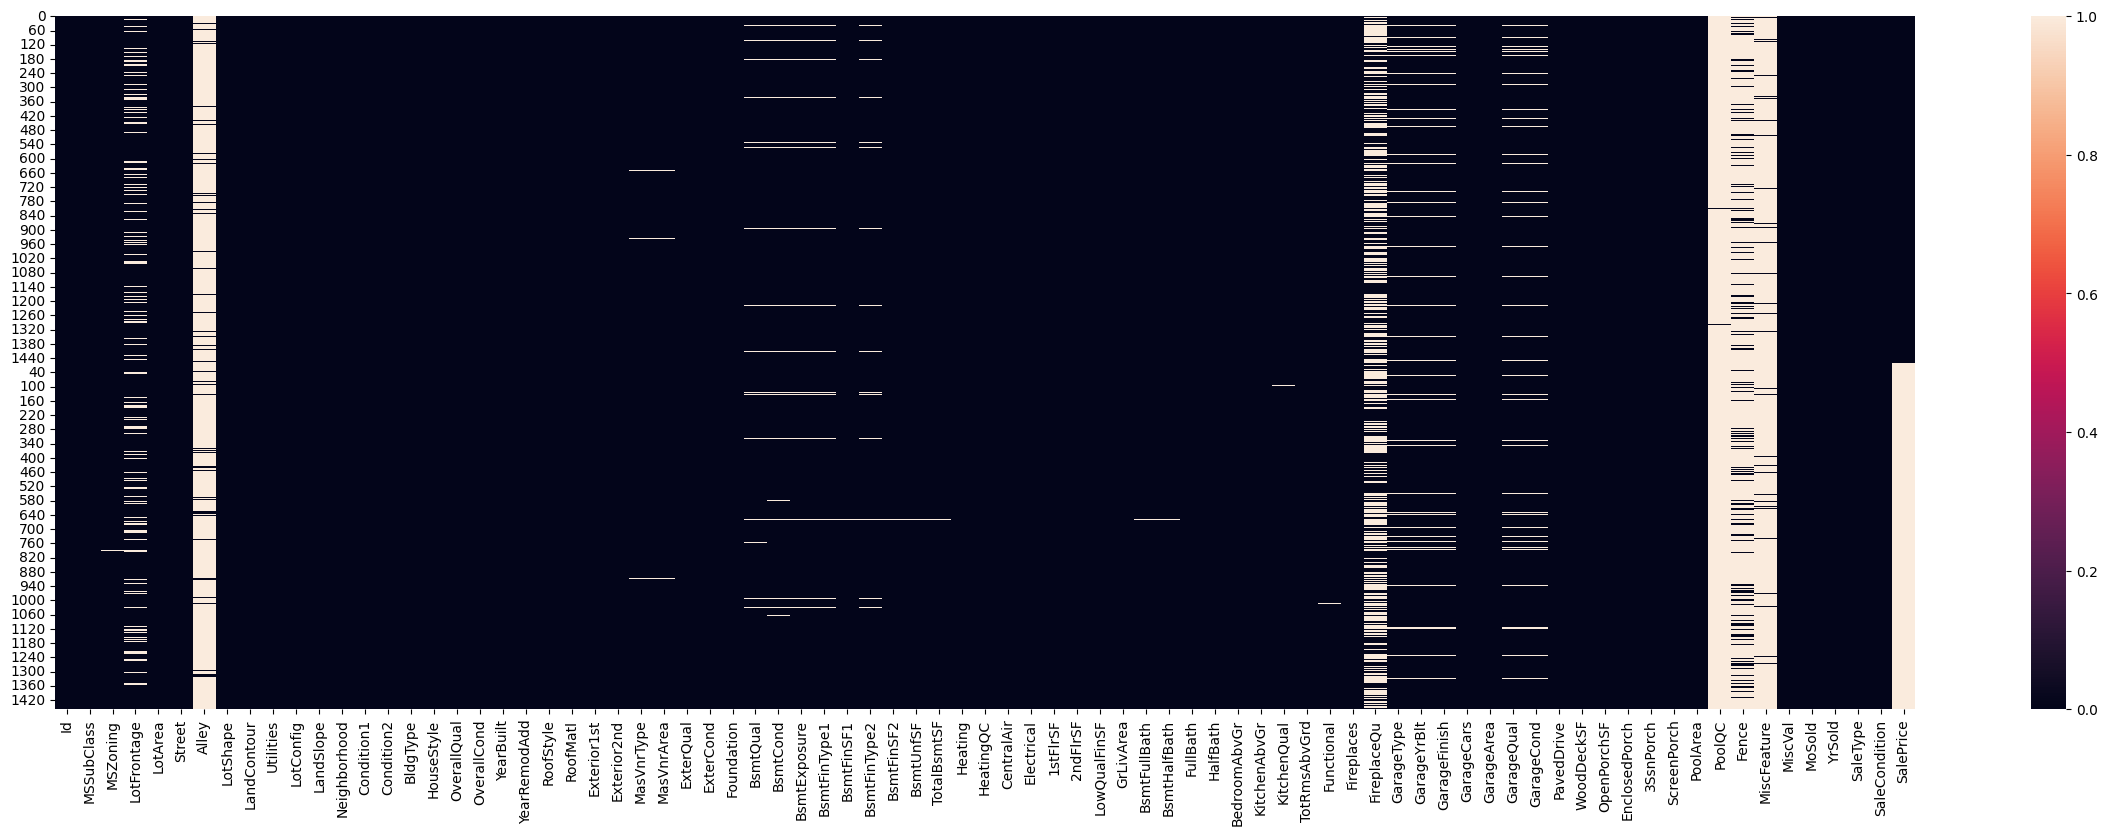

In [19]:
plt.figure(figsize= (30,9))
sns.heatmap(df.isnull())
plt.show()

'Alley', 'FireplaceQu', 'PoolQC', 'Fence', and 'MiscFeature' has lots of  null values.

So they are not much of use to us so, later we can drop them.

In [20]:
# Set the Id column as index

df= df.set_index('Id')

**Let's check the total null values and null percentage value of every features**

In [21]:
null_values = df.isnull().sum()
null_percent = (null_values/df.shape[0]) * 100
null_df = pd.DataFrame({'Null Values' : null_values, 'Null Percent' : null_percent})
null_df

,Null Values,Null Percent
MSSubClass,0,0.000000
MSZoning,4,0.137033
LotFrontage,486,16.649538
LotArea,0,0.000000
Street,0,0.000000
Alley,2721,93.216855
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,2,0.068517
LotConfig,0,0.000000


# **3- Drop Features**

In [22]:
# Features having null values greater than 50%

col_for_drop_20 = null_percent[null_percent > 50]
col_for_drop_20

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

As per domain knowledge, we will not drop these features, instead 'None' value we will add constant values 'NA'.

In [23]:
# Features having null values greater than 20% and less than 51%

col_for_drop_20_50 = null_percent[(null_percent > 20) & (null_percent < 51)]
col_for_drop_20_50

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

As per domain knowledge, we will not drop these features, instead 'None' value we will add constant values 'NA'.

In [24]:
# Features having null values greater than 5% and less than 20%

col_for_drop_20_50 = null_percent[(null_percent > 5) & (null_percent < 20)]
col_for_drop_20_50

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

As per domain knowledge, we will not drop these features, instead 'None' value we will add constant values 'NA'.

As per Observation, we will not drop any feature from the dataset.

# **4- Missing Value Imputation**

In [25]:
missing_value_features = null_percent[null_percent > 0]
print('Total missing value features are: ', len(missing_value_features), '\n')
missing_value_features

Total missing value features are:  35 



MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

# **5- Categorical features**

In [26]:
# Categorical missing value features

cat_na_feat = missing_value_features[missing_value_features.keys().isin(categorical_features)]
print('Total number of Categorical missing value features are :', len(cat_na_feat), '\n')
cat_na_feat

Total number of Categorical missing value features are : 23 



MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

For Categorical data we use 'Mode' Imputation or we will impute with constant value 'NA'.

**Impute MSZoning Feature - 0.137033% missing values**

In [27]:
# First make a copy of original data

data = df.copy()

In [28]:
# Mode Imputation

def mode_imputation(data, feature):
  print('Before imputation the null values is: ')
  print(data[feature].isnull().sum(), '\n\n')
  # Handling feature
  print('The value count is: ')
  print(data[feature].value_counts(), '\n\n')
  # Mode value
  mode_feature = data[feature].mode()[0]
  print('The selected mode is: ')
  print(mode_feature, '\n\n')
  # Replace null value with mode value
  data[feature].replace(np.nan, mode_feature, inplace= True)
  # Now check the missing values in feature
  print('After Imputation the null values is: ')
  print(data[feature].isnull().sum())

In [29]:
# Compare old and new feature

def old_new_feature(df, data, feature):
  plt.figure(figsize=(14, 5))
  plt.subplot(121)
  sns.countplot(x = feature , data= df, palette= 'husl')
  plt.title(f'Old {feature} distribution')
  plt.xticks(rotation = 90)
  plt.subplot(122)
  sns.countplot(x = feature , data= data, palette= 'husl')
  plt.title(f'New {feature} distribution')
  plt.xticks(rotation = 90)
  plt.show()

In [30]:
mode_imputation(data, 'MSZoning')

Before imputation the null values is: 
4 


The value count is: 
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64 


The selected mode is: 
RL 


After Imputation the null values is: 
0


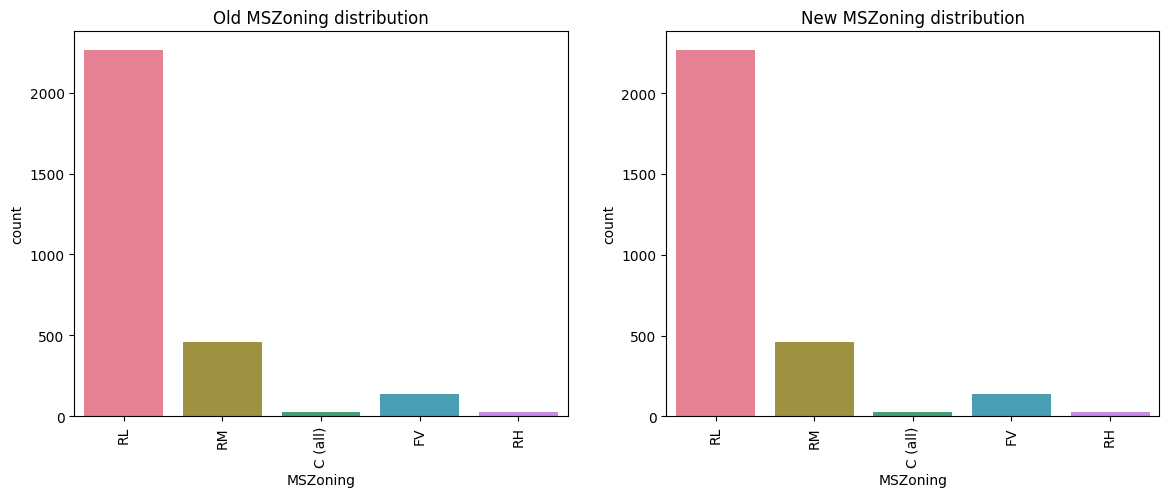

In [31]:
old_new_feature(df, data, 'MSZoning')

**Impute Alley Feature - 93.21655% missing values**

In [32]:
# Constant Imputation

def constant_imputation(data, feature):
  print('Before imputation the null values is: ')
  print(data[feature].isnull().sum(), '\n\n')
  # Handling feature
  print('The value count is: ')
  print(data[feature].value_counts(), '\n\n')
  # constant value
  constant = 'NA'
  # Replace null value with constant value
  data[feature].replace(np.nan, constant, inplace= True)
  # Now check the missing values in feature
  print('After Imputation the null values is: ')
  print(data[feature].isnull().sum())

In [33]:
constant_imputation(data, 'Alley')

Before imputation the null values is: 
2721 


The value count is: 
Grvl    120
Pave     78
Name: Alley, dtype: int64 


After Imputation the null values is: 
0


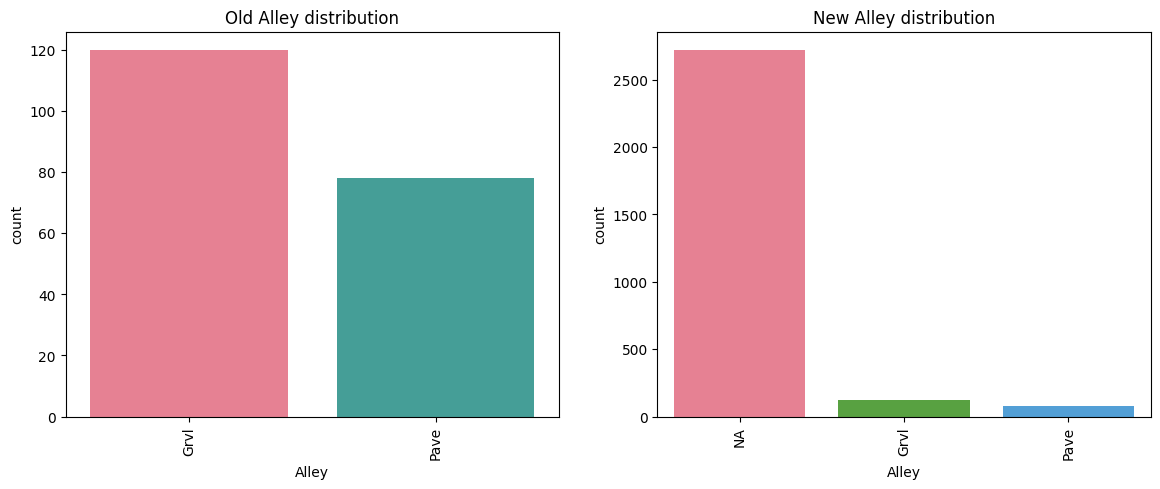

In [34]:
old_new_feature(df, data, 'Alley')

**Impute Utilities Feature - 0.068517% missing values**

In [35]:
mode_imputation(data, 'Utilities')

Before imputation the null values is: 
2 


The value count is: 
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64 


The selected mode is: 
AllPub 


After Imputation the null values is: 
0


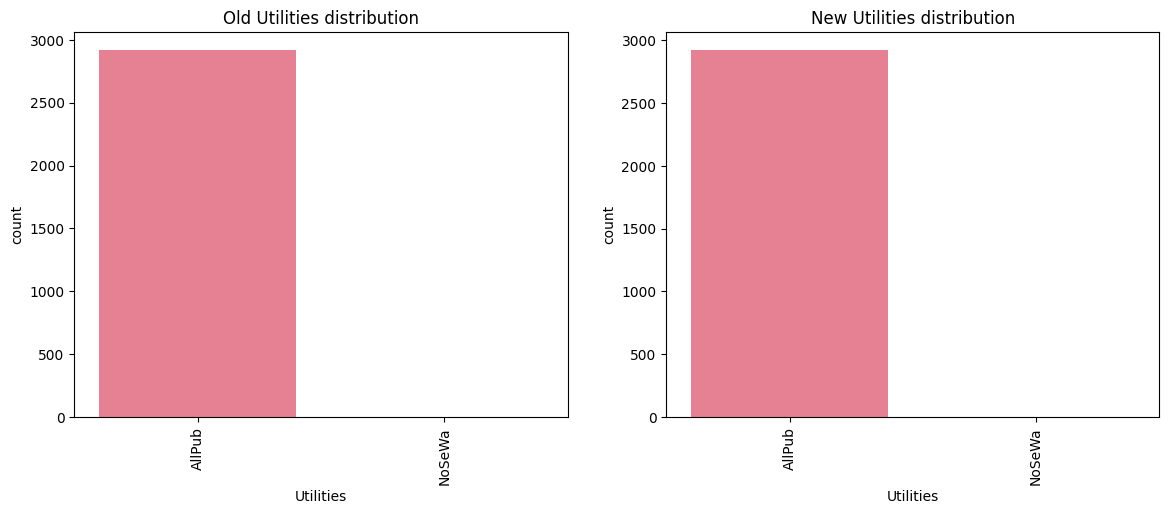

In [36]:
old_new_feature(df, data, 'Utilities')

**Impute Exterior1st Feature - 0.034258% missing values**

In [37]:
mode_imputation(data, 'Exterior1st')

Before imputation the null values is: 
1 


The value count is: 
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64 


The selected mode is: 
VinylSd 


After Imputation the null values is: 
0


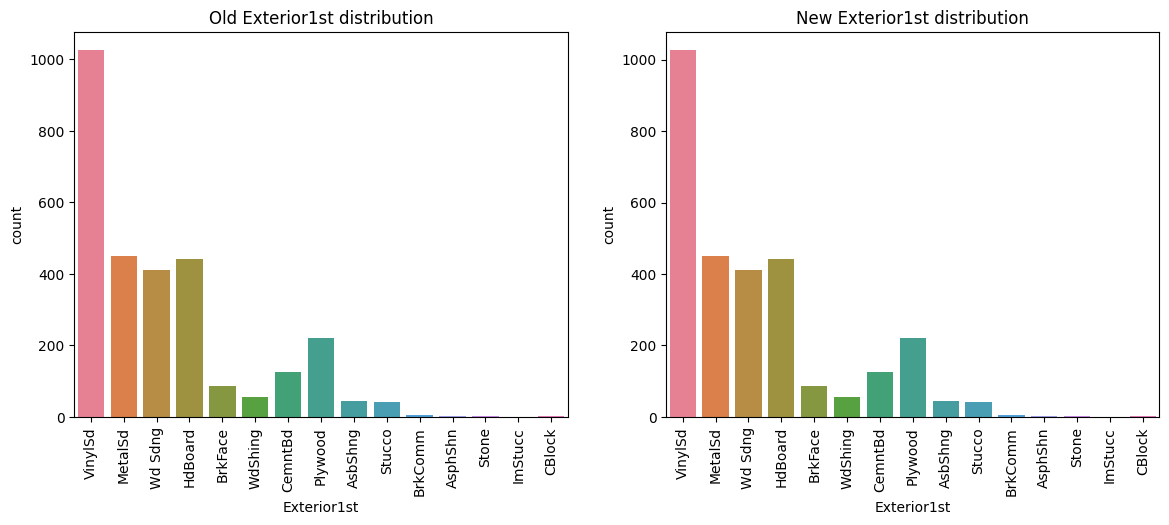

In [38]:
old_new_feature(df, data, 'Exterior1st')

**Impute Exterior2nd Feature - 0.034258% missing values**

In [39]:
mode_imputation(data, 'Exterior2nd')

Before imputation the null values is: 
1 


The value count is: 
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64 


The selected mode is: 
VinylSd 


After Imputation the null values is: 
0


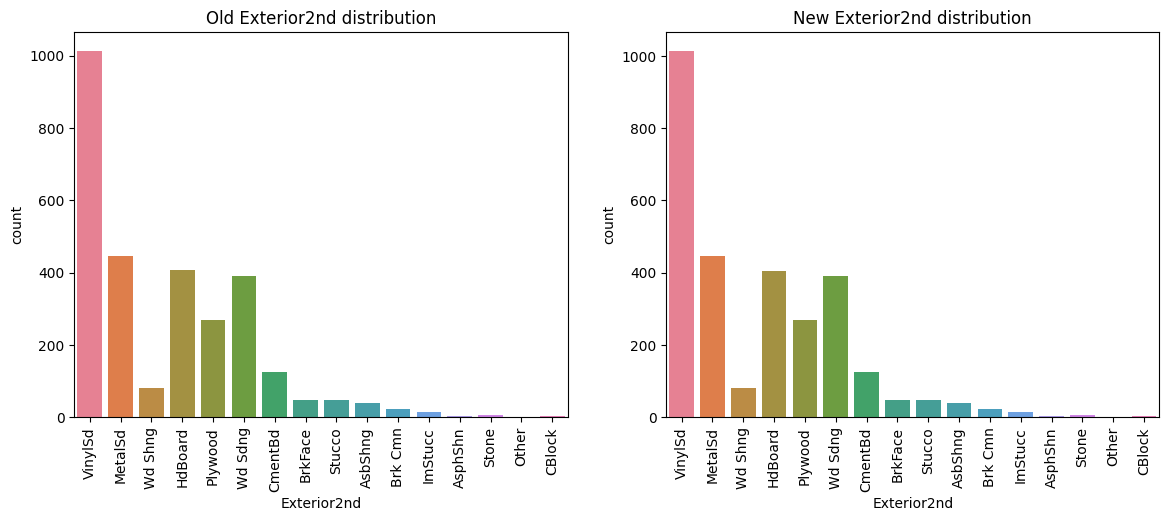

In [40]:
old_new_feature(df, data, 'Exterior2nd')

**Impute MasVnrType Feature - 0.822199% missing values**

In [41]:
mode_imputation(data, 'MasVnrType')

Before imputation the null values is: 
24 


The value count is: 
None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64 


The selected mode is: 
None 


After Imputation the null values is: 
0


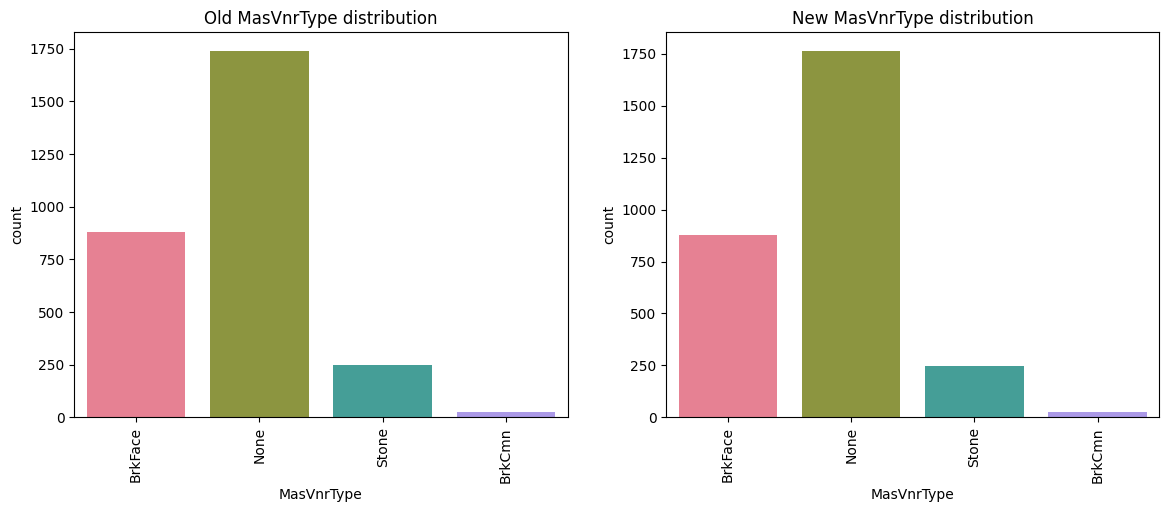

In [42]:
old_new_feature(df, data, 'MasVnrType')

**Impute BsmtQual Feature - 2.774923% missing values**

In [43]:
constant_imputation(data, 'BsmtQual')

Before imputation the null values is: 
81 


The value count is: 
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64 


After Imputation the null values is: 
0


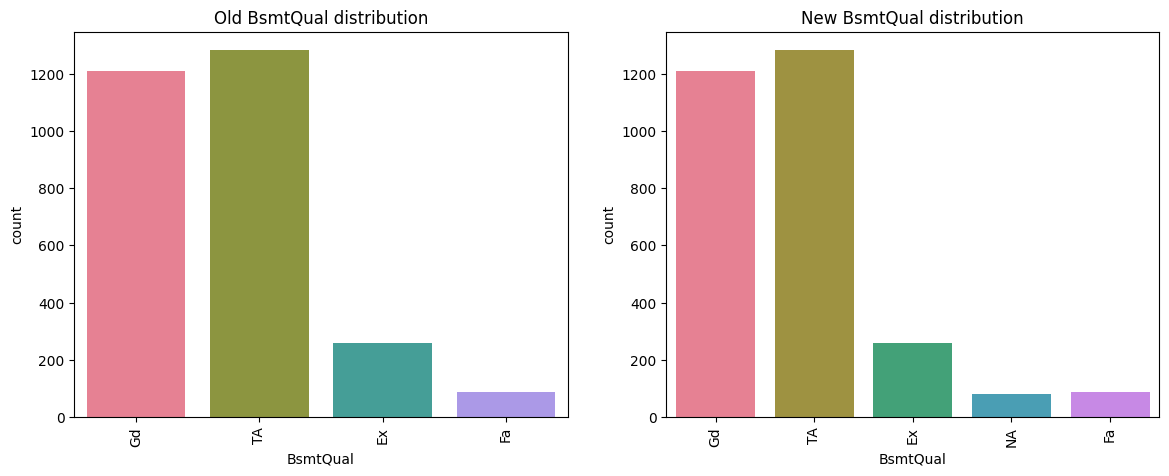

In [44]:
old_new_feature(df, data, 'BsmtQual')

**Impute BsmtCond Feature - 2.809181% missing values**

In [45]:
constant_imputation(data, 'BsmtCond')

Before imputation the null values is: 
82 


The value count is: 
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64 


After Imputation the null values is: 
0


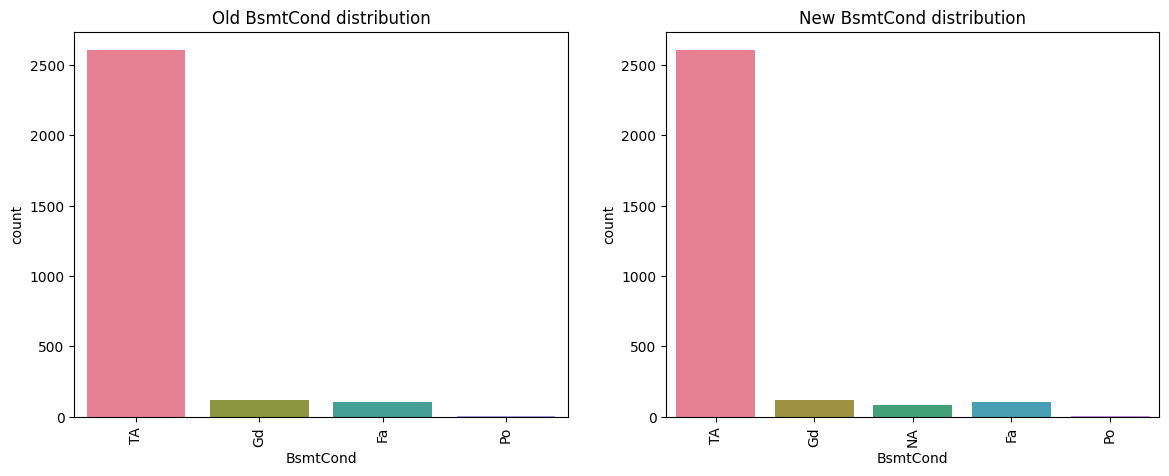

In [46]:
old_new_feature(df, data, 'BsmtCond')

**Impute BsmtExposure Feature - 2.809181% missing values**

In [47]:
constant_imputation(data, 'BsmtExposure')

Before imputation the null values is: 
82 


The value count is: 
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64 


After Imputation the null values is: 
0


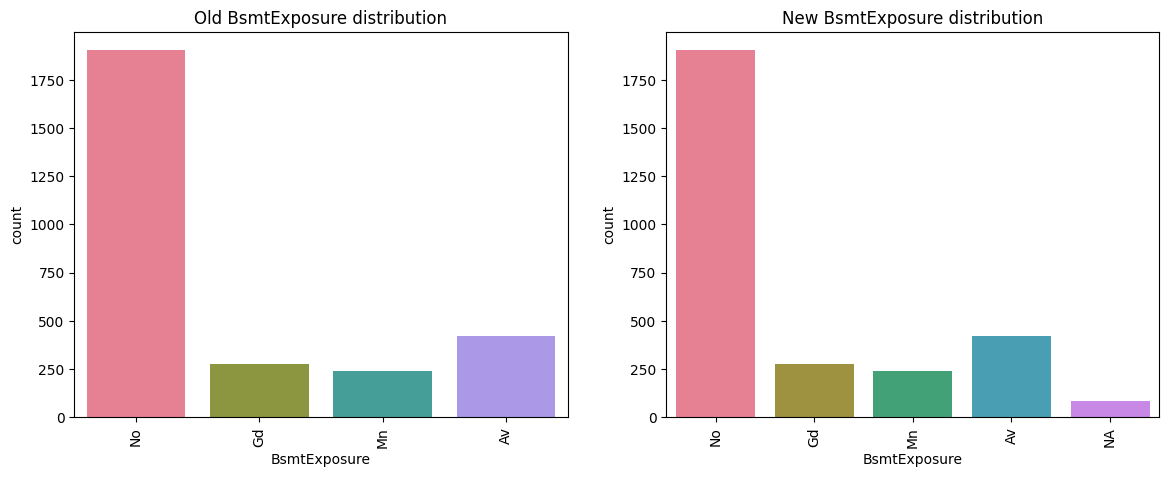

In [48]:
old_new_feature(df, data, 'BsmtExposure')

**Impute BsmtFinType1 Feature - 2.706406% missing values**

In [49]:
constant_imputation(data, 'BsmtFinType1')

Before imputation the null values is: 
79 


The value count is: 
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64 


After Imputation the null values is: 
0


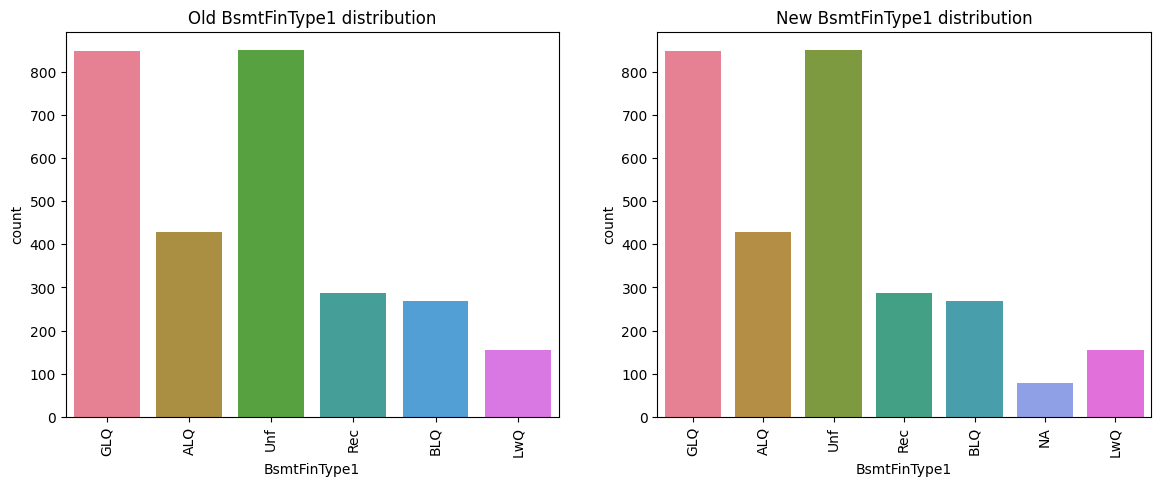

In [50]:
old_new_feature(df, data, 'BsmtFinType1')

**Impute BsmtFinType2 Feature - 2.740665% missing values**

In [51]:
constant_imputation(data, 'BsmtFinType2')

Before imputation the null values is: 
80 


The value count is: 
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64 


After Imputation the null values is: 
0


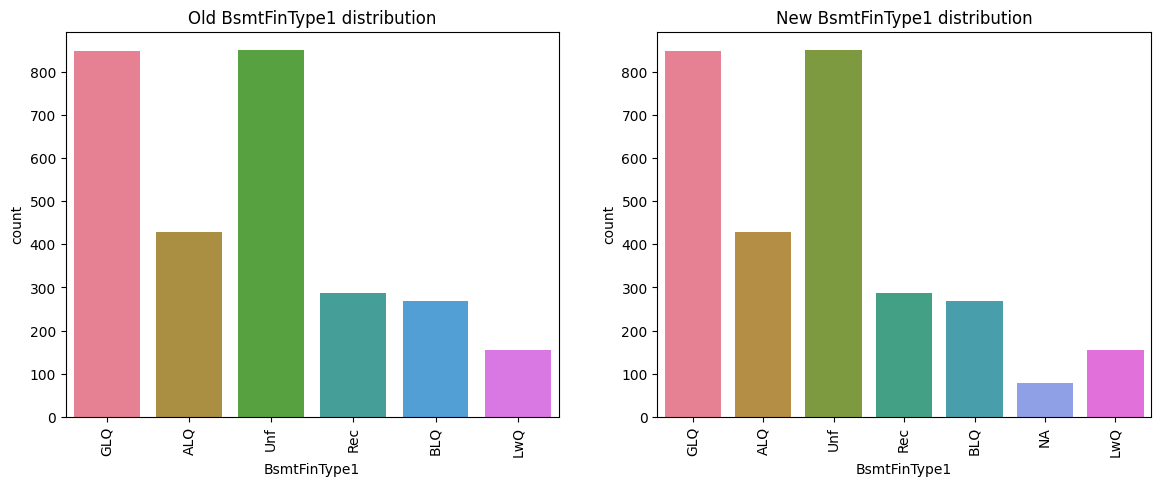

In [52]:
old_new_feature(df, data, 'BsmtFinType1')

**Impute Electrical Feature - 0.034258% missing values**

In [53]:
mode_imputation(data, 'Electrical')

Before imputation the null values is: 
1 


The value count is: 
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64 


The selected mode is: 
SBrkr 


After Imputation the null values is: 
0


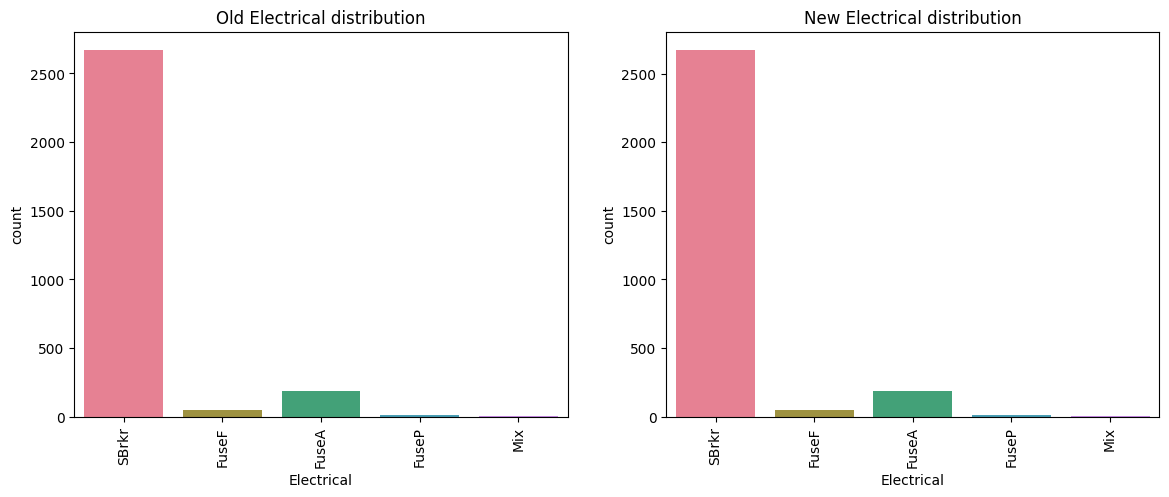

In [54]:
old_new_feature(df, data, 'Electrical')

**Impute KitchenQual Feature - 0.034258% missing values**

In [55]:
mode_imputation(data, 'KitchenQual')

Before imputation the null values is: 
1 


The value count is: 
TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64 


The selected mode is: 
TA 


After Imputation the null values is: 
0


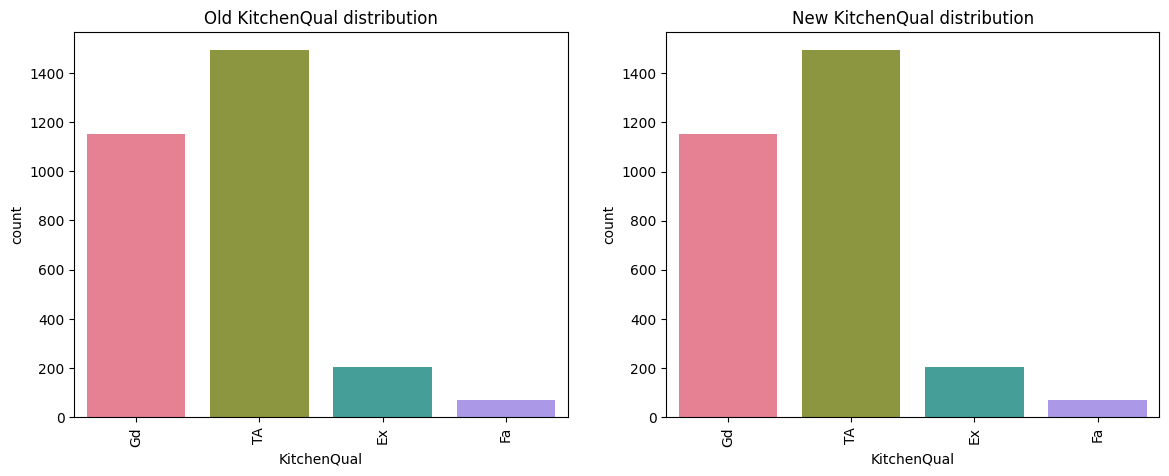

In [56]:
old_new_feature(df, data, 'KitchenQual')

**Impute Functional Feature - 0.068517% missing values**

In [57]:
mode_imputation(data, 'Functional')

Before imputation the null values is: 
2 


The value count is: 
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64 


The selected mode is: 
Typ 


After Imputation the null values is: 
0


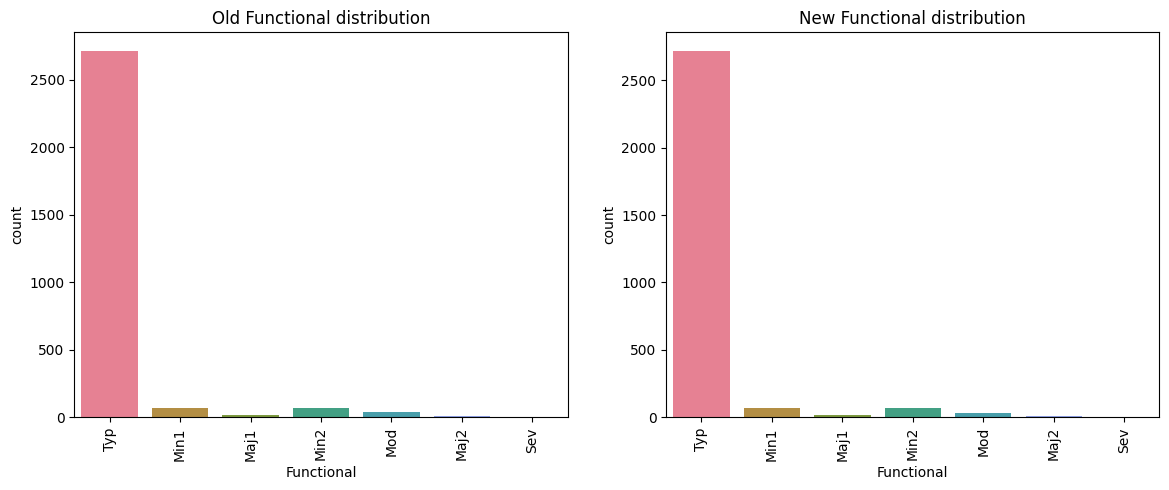

In [58]:
old_new_feature(df, data, 'Functional')

**Impute FireplaceQu Feature - 48.646797% missing values**

In [59]:
constant_imputation(data, 'FireplaceQu')

Before imputation the null values is: 
1420 


The value count is: 
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64 


After Imputation the null values is: 
0


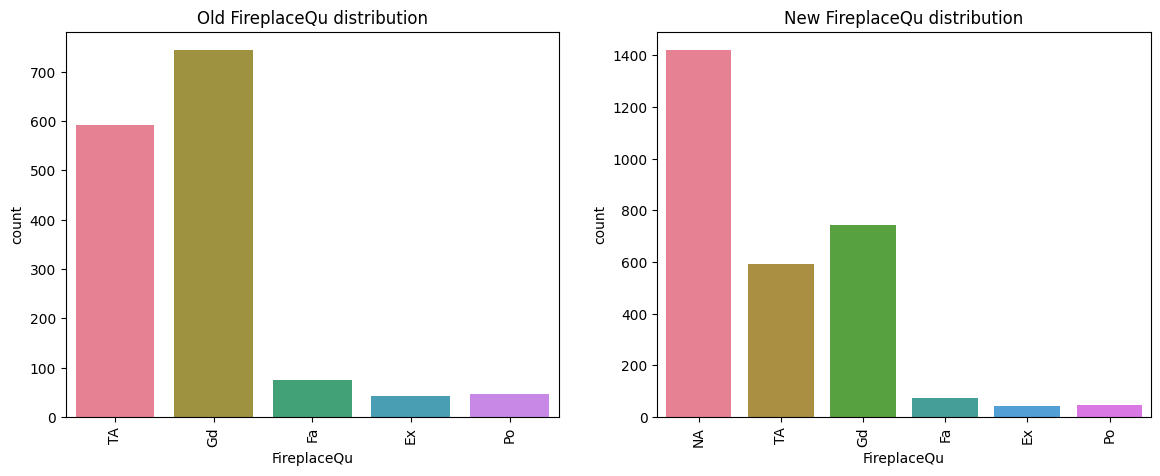

In [60]:
old_new_feature(df, data, 'FireplaceQu')

**Impute GarageType Feature - 5.378554% missing values**

In [61]:
constant_imputation(data, 'GarageType')

Before imputation the null values is: 
157 


The value count is: 
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64 


After Imputation the null values is: 
0


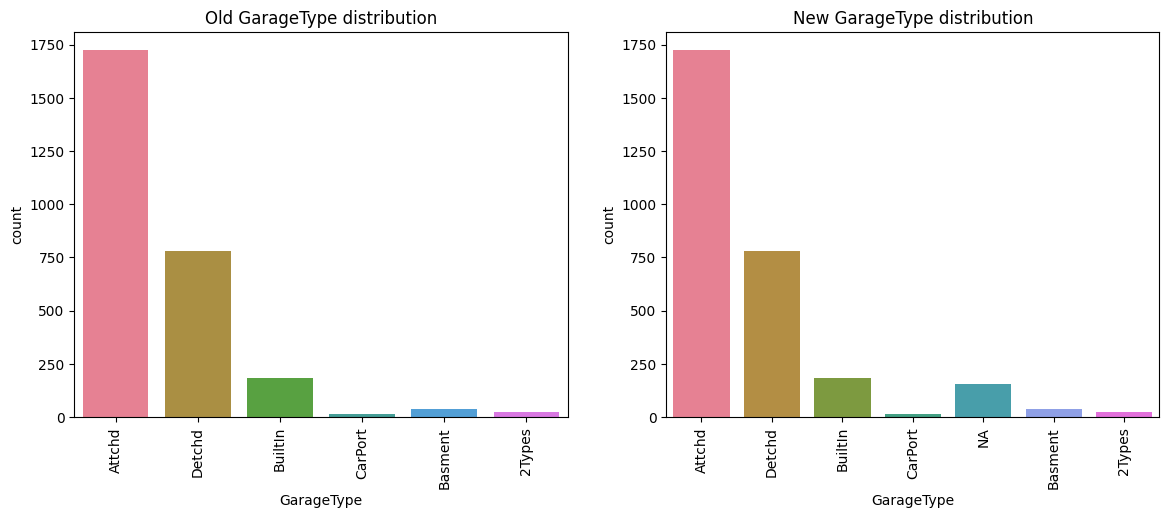

In [62]:
old_new_feature(df, data, 'GarageType')

**Impute GarageFinish Feature - 5.447071% missing values**

In [63]:
constant_imputation(data, 'GarageFinish')

Before imputation the null values is: 
159 


The value count is: 
Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64 


After Imputation the null values is: 
0


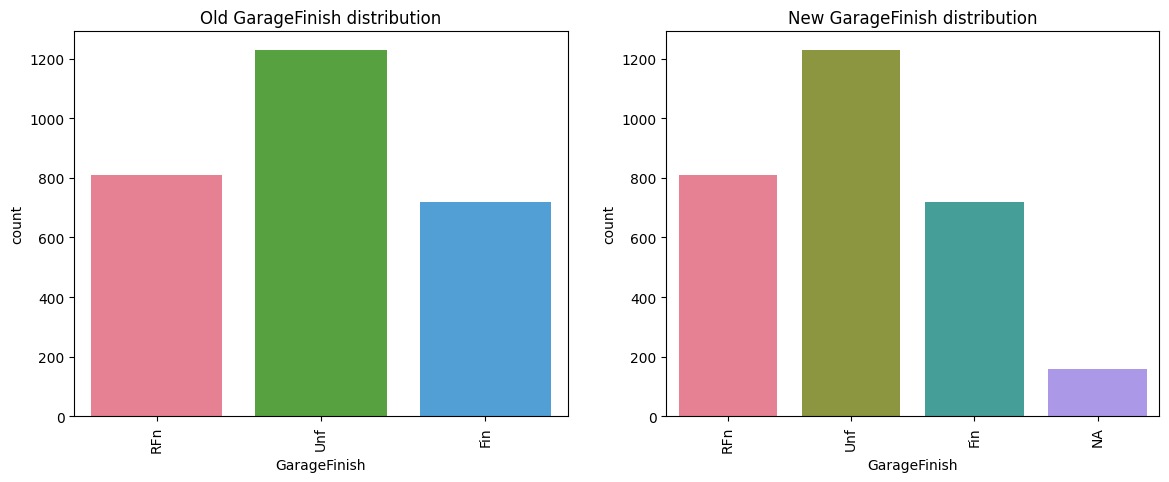

In [64]:
old_new_feature(df, data, 'GarageFinish')

**Impute GarageQual Feature - 5.447071% missing values**

In [65]:
constant_imputation(data, 'GarageQual')

Before imputation the null values is: 
159 


The value count is: 
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64 


After Imputation the null values is: 
0


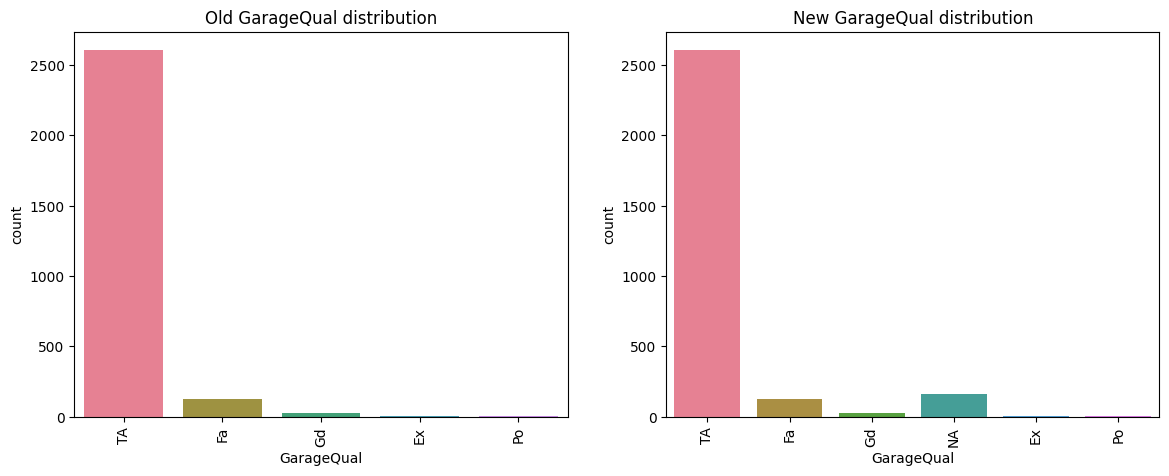

In [66]:
old_new_feature(df, data, 'GarageQual')

**Impute GarageCond Feature - 5.447071% missing values**

In [67]:
constant_imputation(data, 'GarageCond')

Before imputation the null values is: 
159 


The value count is: 
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64 


After Imputation the null values is: 
0


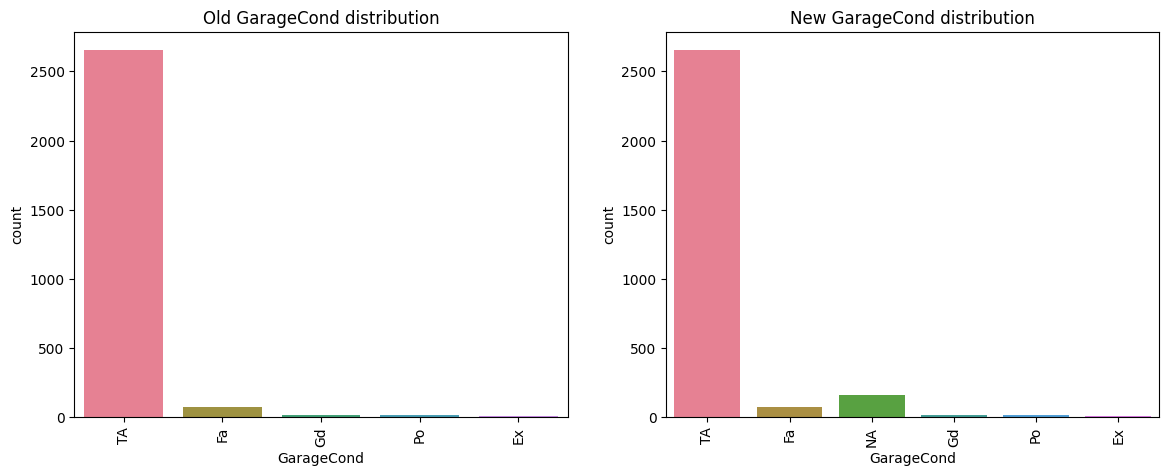

In [68]:
old_new_feature(df, data, 'GarageCond')

**Impute PoolQC Feature - 9.657417% missing values**

In [69]:
constant_imputation(data, 'PoolQC')

Before imputation the null values is: 
2909 


The value count is: 
Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64 


After Imputation the null values is: 
0


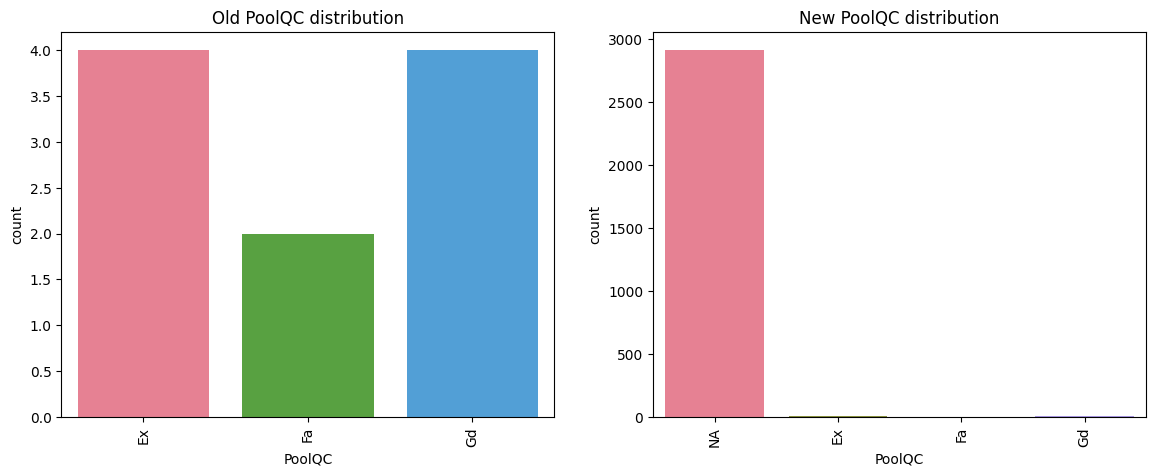

In [70]:
old_new_feature(df, data, 'PoolQC')

**Impute Fence Feature - 80.438506% missing values**

In [71]:
constant_imputation(data, 'Fence')

Before imputation the null values is: 
2348 


The value count is: 
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64 


After Imputation the null values is: 
0


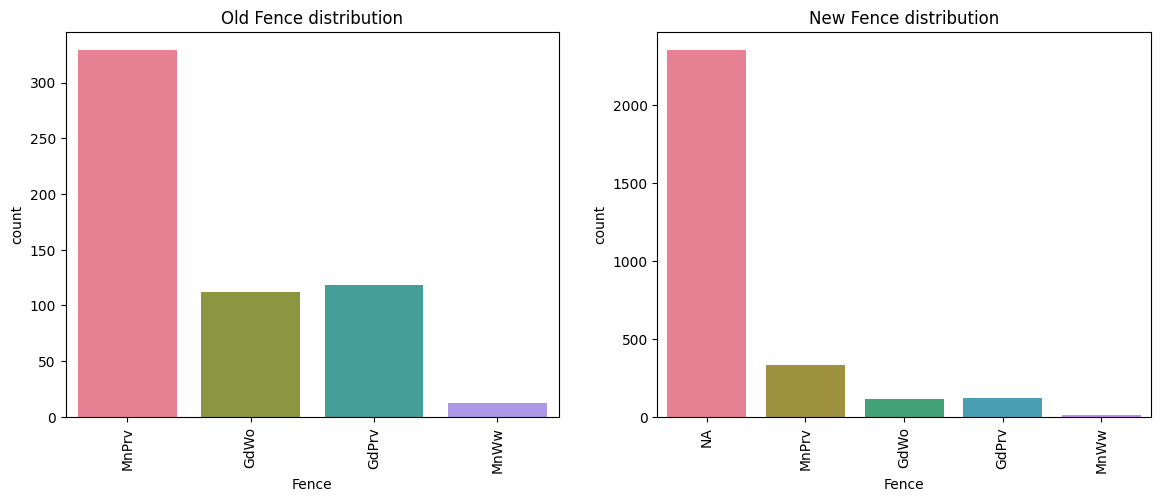

In [72]:
old_new_feature(df, data, 'Fence')

**Impute MiscFeature Feature - 96.402878% missing values**

In [73]:
constant_imputation(data, 'MiscFeature')

Before imputation the null values is: 
2814 


The value count is: 
Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64 


After Imputation the null values is: 
0


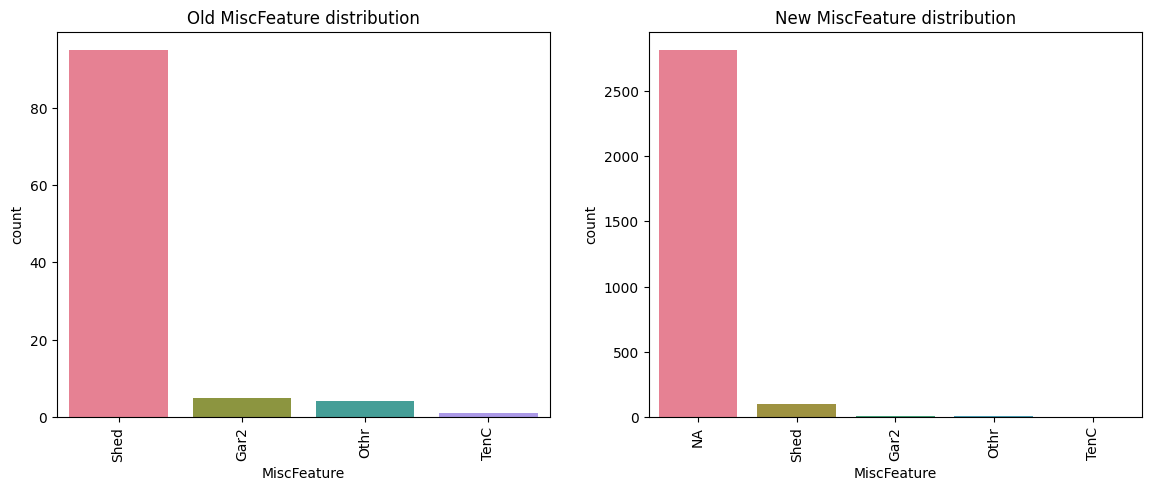

In [74]:
old_new_feature(df, data, 'MiscFeature')

**Impute SaleType Feature - 0.034258% missing values**

In [75]:
mode_imputation(data, 'MiscFeature')

Before imputation the null values is: 
0 


The value count is: 
NA      2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64 


The selected mode is: 
NA 


After Imputation the null values is: 
0


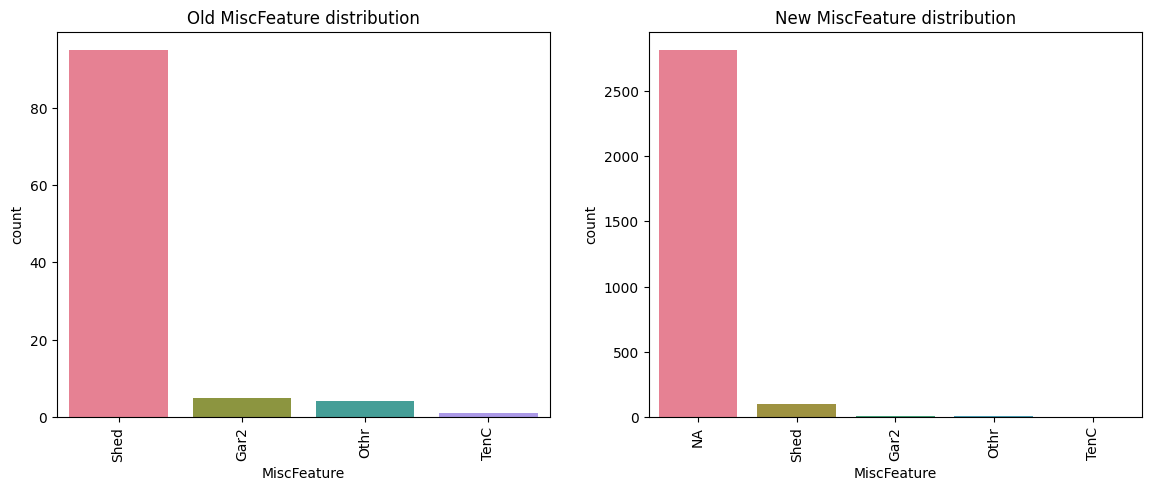

In [76]:
old_new_feature(df, data, 'MiscFeature')

# **6- Numerical Imputation**

In [77]:
# Integer missing value features

int_na_feat = missing_value_features[missing_value_features.keys().isin(int_features)]
print('Total number of Integer missing value features are :', len(int_na_feat), '\n')
int_na_feat

Total number of Integer missing value features are : 0 



Series([], dtype: float64)

In [78]:
# Float missing value features

float_na_feat = missing_value_features[missing_value_features.keys().isin(float_features)]
print('Total number of Float missing value features are :', len(float_na_feat), '\n')
float_na_feat

Total number of Float missing value features are : 12 



LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

For Numerical data we use 'Mean' or 'Median' Imputation depend on the data.

If it is normally distributed data then we use 'Mean' Imputation.

If it is right or left skewed data then we use 'Median' Imputation.

**Impute LotFrontage Feature- 16.649538% Missing Values**

In [79]:
# To check whether there are outliers, or data is normally distributed or left/right skewed

def boxdistplot(df, feature):
  plt.figure(figsize = (12,4))
  plt.subplot(121)
  sns.boxplot(df[feature], orient = 'h')
  plt.title(f'Box Plot')
  plt.subplot(122)
  sns.distplot(df[feature])
  plt.title(f'Distribution')
  plt.show()

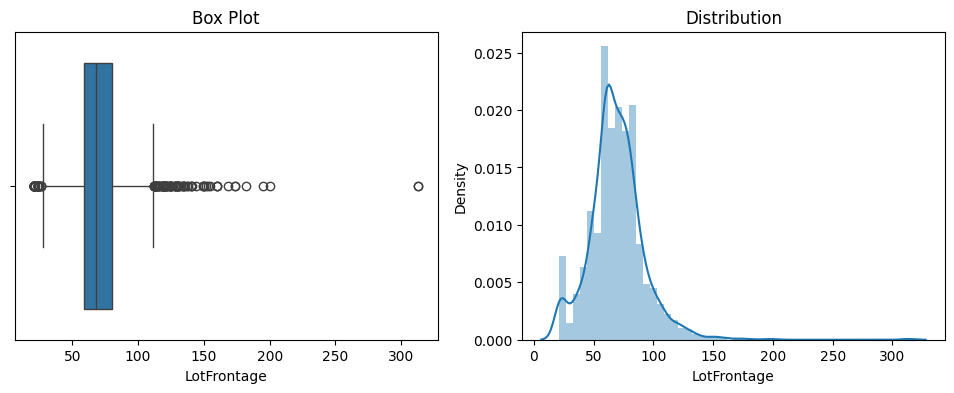

In [80]:
boxdistplot(df, 'LotFrontage')

'LotFrontage' feature is right skewed so, for imputation we will use 'Median' values.

In [81]:
def median_imputation(data, feature):
  print('Before imputation the null values is: ')
  print(data[feature].isnull().sum(), '\n\n')
  # Median value
  median_feature = data[feature].median()
  print('The selected median is: ')
  print(median_feature, '\n\n')
  # Replace null value with median value
  data[feature].replace(np.nan, median_feature, inplace= True)
  # Now check the missing values in feature
  print('After Imputation the null values is: ')
  print(data[feature].isnull().sum())

In [82]:
median_imputation(data, 'LotFrontage')

Before imputation the null values is: 
486 


The selected median is: 
68.0 


After Imputation the null values is: 
0


In [83]:
def compareboxdistplot(df, data, feature):
  plt.figure(figsize= (14,7))
  plt.subplot(221)
  sns.boxplot(df[feature], orient = 'h')
  plt.title('Old Data Boxplot')
  plt.subplot(222)
  sns.distplot(df[feature])
  plt.title('Old Data Distribution')
  plt.subplot(223)
  sns.boxplot(data[feature], orient = 'h')
  plt.title('New Data Boxplot')
  plt.subplot(224)
  sns.distplot(data[feature])
  plt.title('New Data Distribution')
  plt.show()

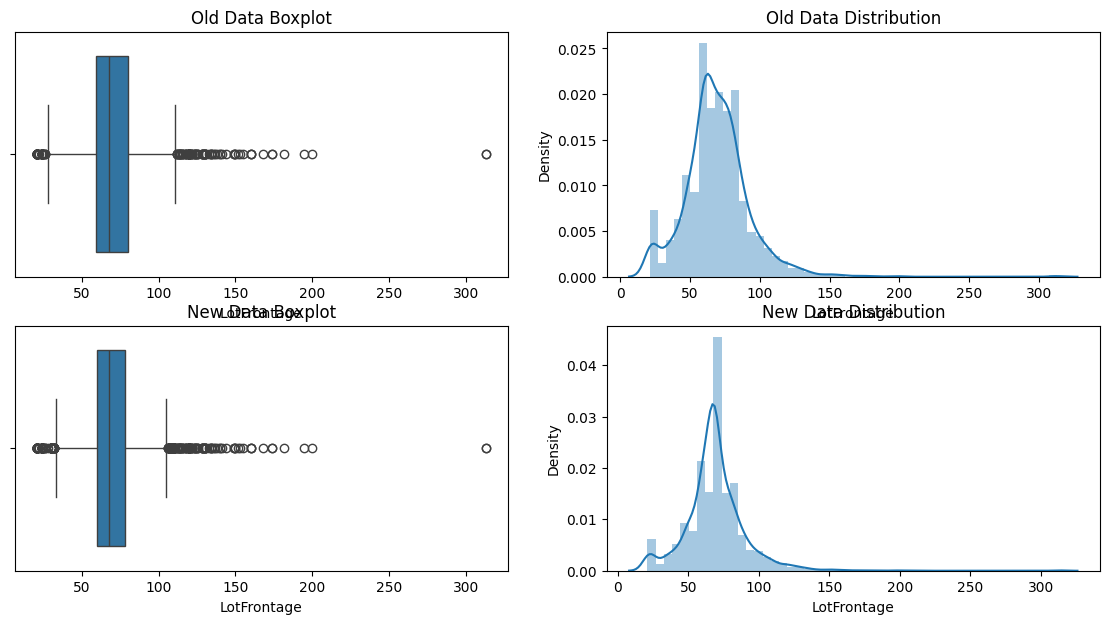

In [84]:
compareboxdistplot(df, data, 'LotFrontage')

**Impute MasVnrArea Feature- 0.787941% Missing Values**

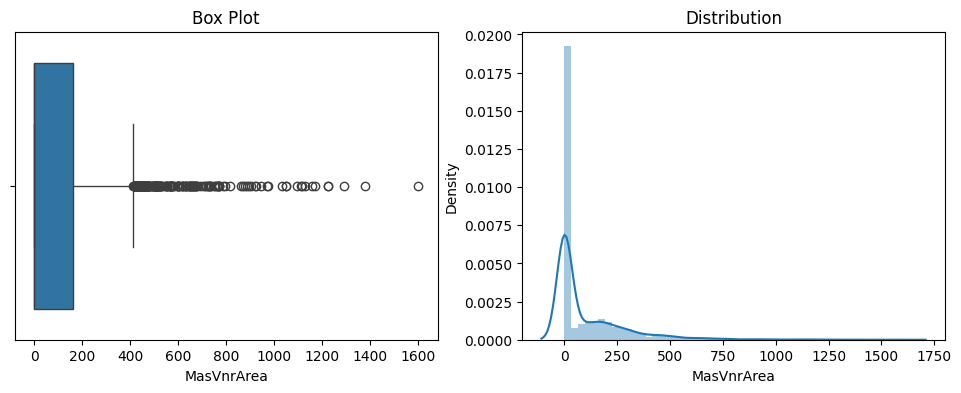

In [85]:
boxdistplot(df, 'MasVnrArea')

Categorical feature 'MasVnrType' has some none values and if we don't even have values then how can there be any area.

so 'MasVnrArea' is imputed with '0' value.

In [86]:
def zero_imputation(data, feature):
  print('Before imputation the null values is: ')
  print(data[feature].isnull().sum(), '\n\n')
  # Impute value
  zero_feature = 0
  # Replace null value with 0
  data[feature].replace(np.nan, zero_feature, inplace= True)
  # Now check the missing values in feature
  print('After Imputation the null values is: ')
  print(data[feature].isnull().sum())

In [87]:
zero_imputation(data, 'MasVnrArea')

Before imputation the null values is: 
23 


After Imputation the null values is: 
0


**Relation Between Categorical 'Basement' features and Numerical 'Basement' features.**

In [88]:
cat_base = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual']
num_base = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath' ]
df_basement = df[num_base + cat_base]
df_basement[df_basement.isnull().any(axis = 1)]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual
Id,,,,,,,,,,,
18,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
40,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
91,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
103,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
157,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
183,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
260,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
333,1124.0,479.0,1603.0,3206.0,1.0,0.0,TA,No,GLQ,NaN,Gd
343,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


 All Categorical 'Basement' features have 'Na' values so all Numerical 'Basement' features should be imputed with '0' in null values places.

**Impute BsmtFinSF1 Feature- 0.034258% Missing Values**

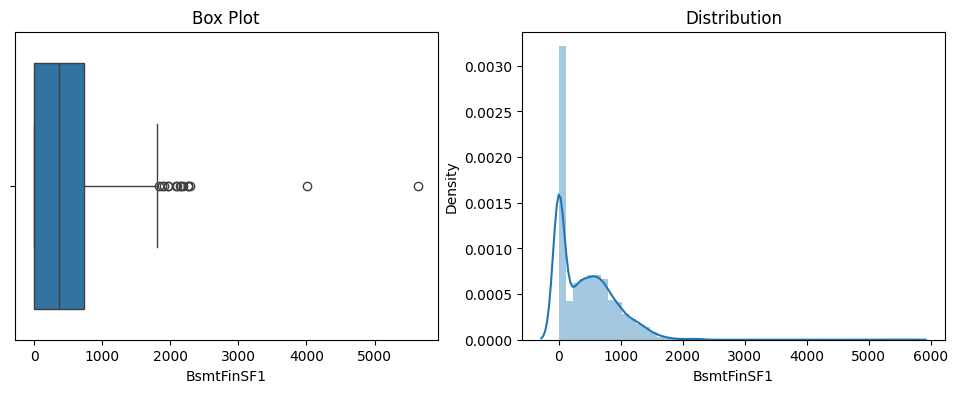

In [89]:
boxdistplot(df, 'BsmtFinSF1')

In [90]:
zero_imputation(data, 'BsmtFinSF1')

Before imputation the null values is: 
1 


After Imputation the null values is: 
0


**Impute BsmtFinSF2 Feature- 0.034258% Missing Values**

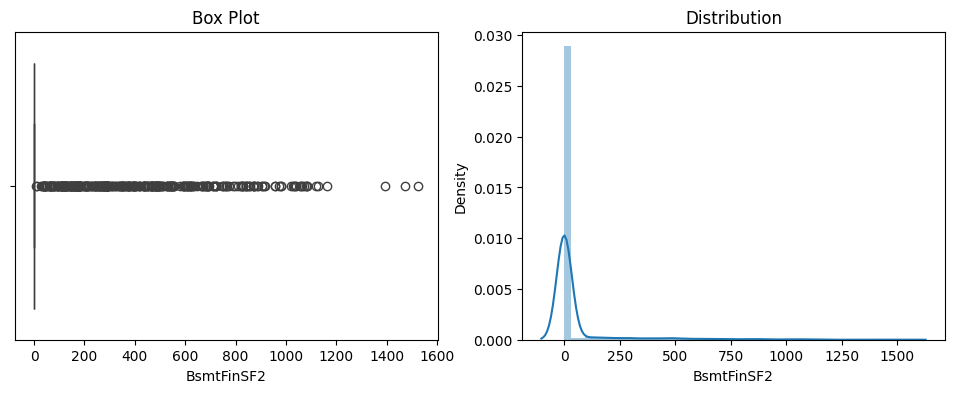

In [91]:
boxdistplot(df, 'BsmtFinSF2')

In [92]:
zero_imputation(data, 'BsmtFinSF2')

Before imputation the null values is: 
1 


After Imputation the null values is: 
0


**Impute BsmtUnfSF Feature- 0.034258% Missing Values**

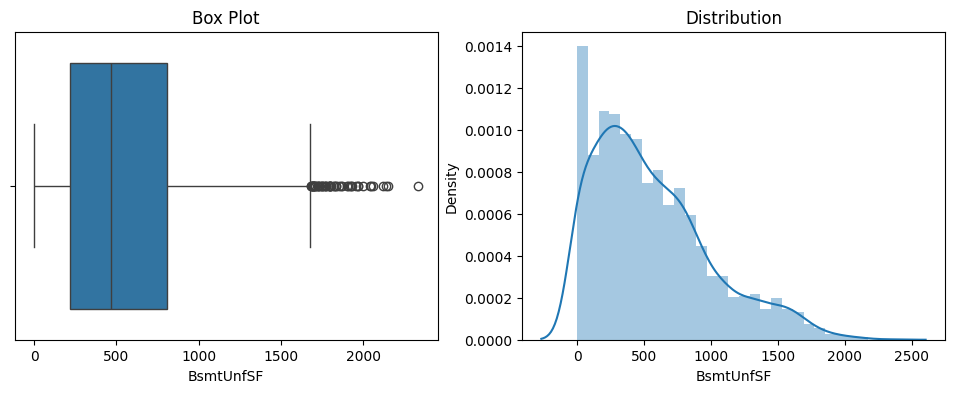

In [93]:
boxdistplot(df, 'BsmtUnfSF')

In [94]:
zero_imputation(data, 'BsmtUnfSF')

Before imputation the null values is: 
1 


After Imputation the null values is: 
0


**Impute TotalBsmtSF Feature- 0.034258% Missing Values**

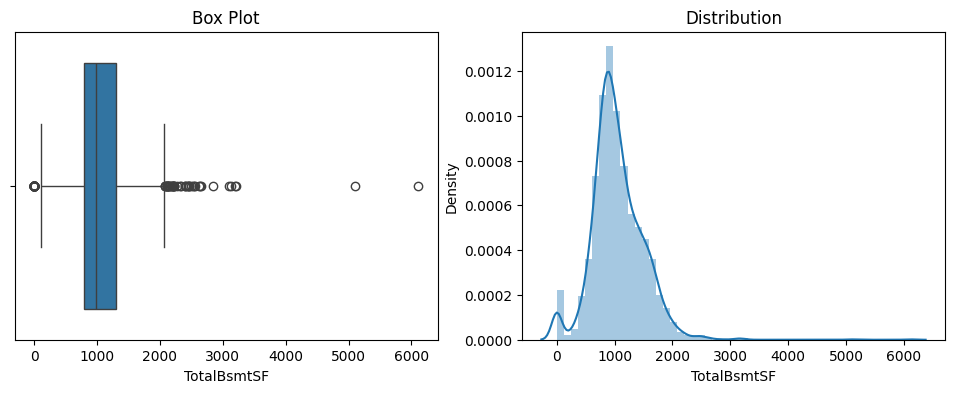

In [95]:
boxdistplot(df, 'TotalBsmtSF')

In [96]:
zero_imputation(data, 'TotalBsmtSF')

Before imputation the null values is: 
1 


After Imputation the null values is: 
0


**Impute BsmtFullBath Feature- 0.068517% Missing Values**

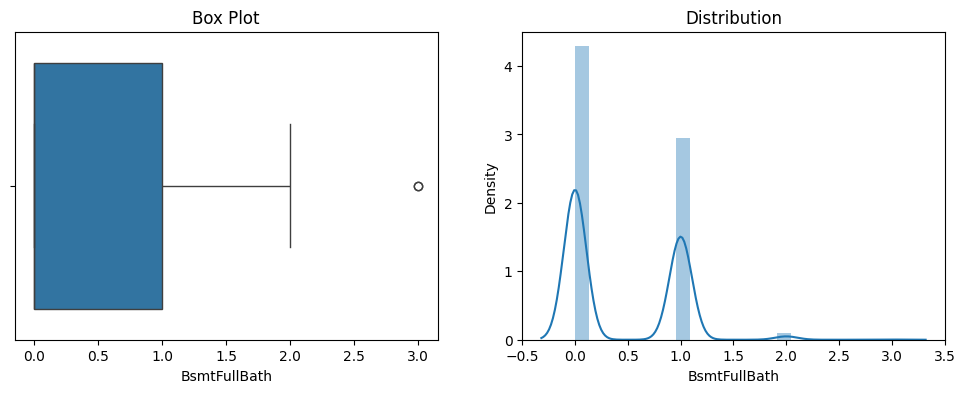

In [97]:
boxdistplot(df, 'BsmtFullBath')

In [98]:
zero_imputation(data, 'BsmtFullBath')

Before imputation the null values is: 
2 


After Imputation the null values is: 
0


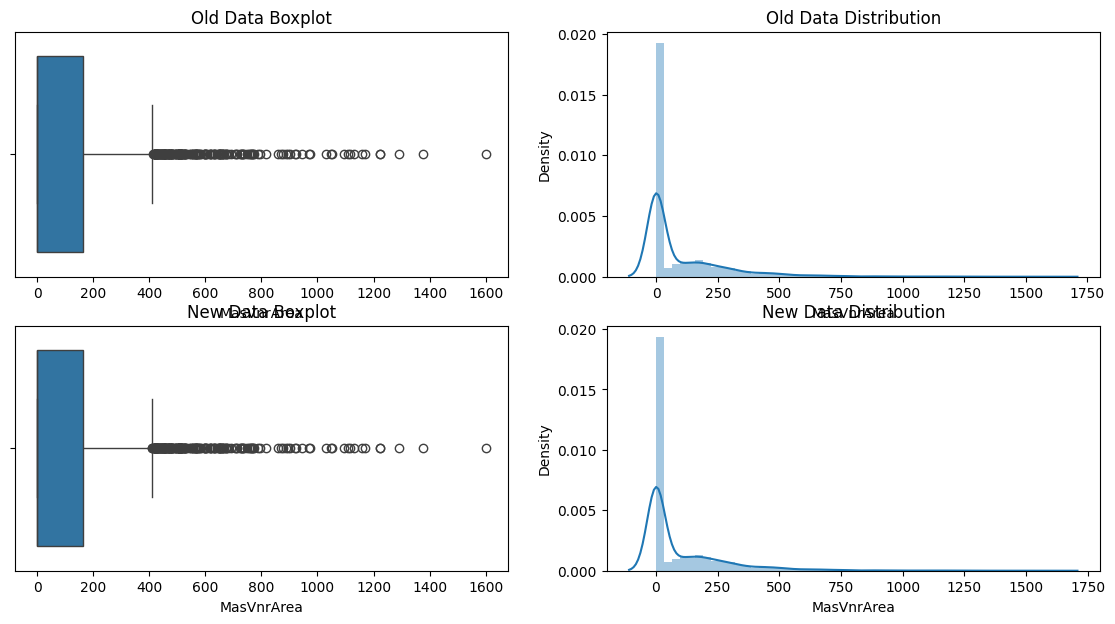

In [99]:
compareboxdistplot(df, data, 'MasVnrArea')

**Impute BsmtHalfBath Feature- 0.068517% Missing Values**

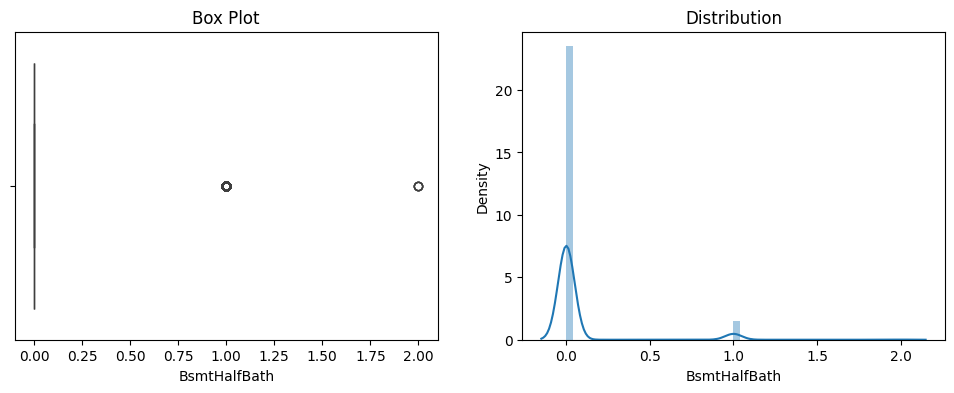

In [100]:
boxdistplot(df, 'BsmtHalfBath')

In [101]:
zero_imputation(data, 'BsmtHalfBath')

Before imputation the null values is: 
2 


After Imputation the null values is: 
0


**Relation Between Categorical 'Garage' features and Numerical 'Garage' features.**

In [102]:
cat_base = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
num_base = ['GarageYrBlt', 'GarageCars', 'GarageArea']
df_basement = df[num_base + cat_base]
df_basement[df_basement.isnull().any(axis = 1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,NaN,NaN,NaN,NaN
49,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
90,NaN,0.0,0.0,NaN,NaN,NaN,NaN
100,NaN,0.0,0.0,NaN,NaN,NaN,NaN
109,NaN,0.0,0.0,NaN,NaN,NaN,NaN
126,NaN,0.0,0.0,NaN,NaN,NaN,NaN
128,NaN,0.0,0.0,NaN,NaN,NaN,NaN


 All Categorical 'Garage' features have 'Na' values so all Numerical 'Garage' features should be imputed with '0' in null values places.

**Impute GarageYrBlt Feature- 5.447071% Missing Values**

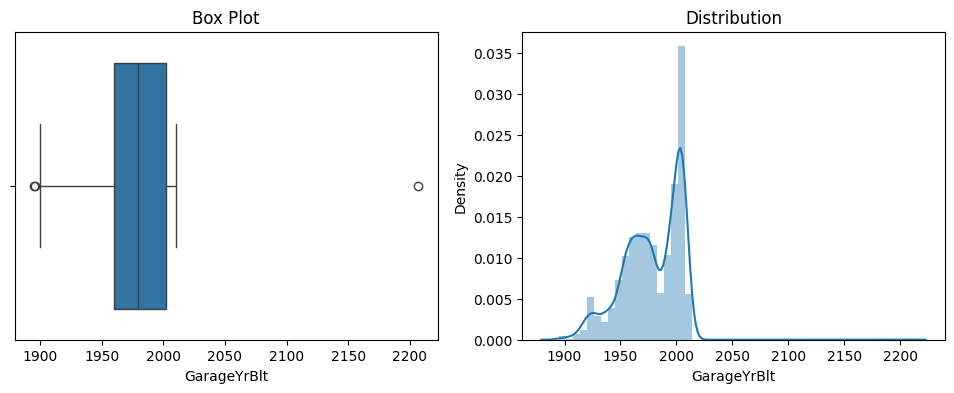

In [103]:
boxdistplot(df, 'GarageYrBlt')

In [104]:
zero_imputation(data, 'GarageYrBlt')

Before imputation the null values is: 
159 


After Imputation the null values is: 
0


**Impute GarageCars Feature- 0.034258% Missing Values**

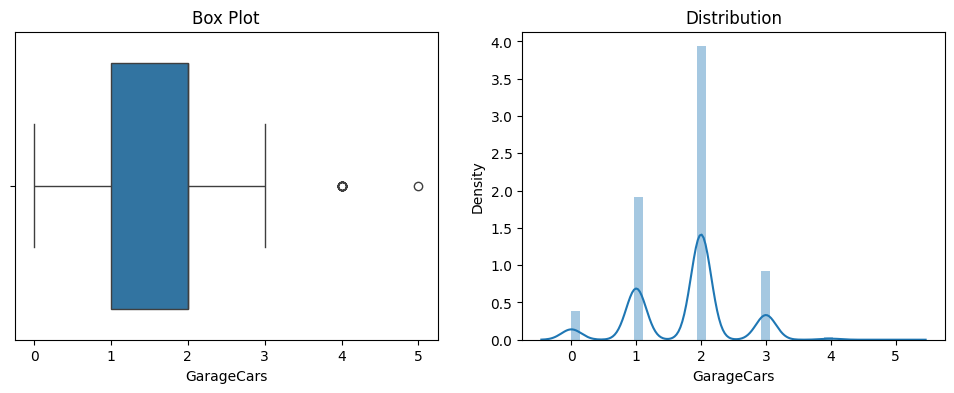

In [105]:
boxdistplot(df, 'GarageCars')

In [106]:
zero_imputation(data, 'GarageCars')

Before imputation the null values is: 
1 


After Imputation the null values is: 
0


**Impute GarageArea Feature- 0.034258% Missing Values**

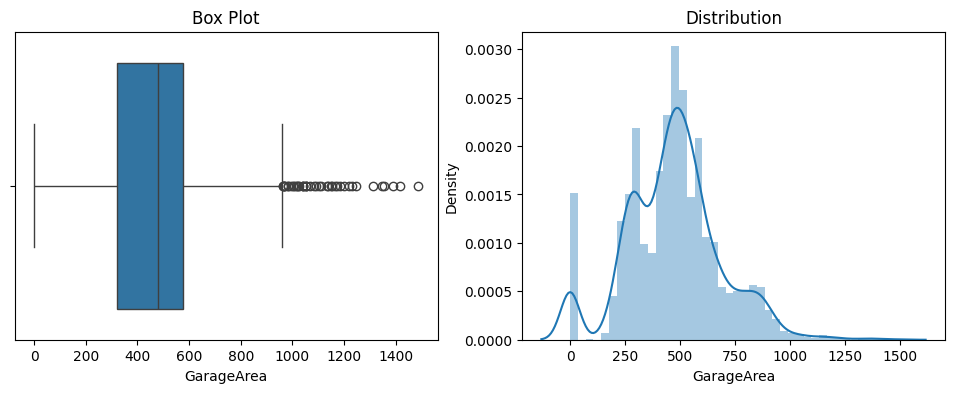

In [107]:
boxdistplot(df, 'GarageArea')

In [108]:
zero_imputation(data, 'GarageArea')

Before imputation the null values is: 
1 


After Imputation the null values is: 
0


**Now check missing values**

In [109]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

# **Feature Transformation**

In [110]:
# all columns

data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# **1- Convert Numerical Features to Categorical Features**

In [111]:
int_features

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [115]:
float_features

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

For numerical features, the model will take them on their face value than compare them.

But some features if taken on their face value will give incorrect model result, so we have to convert them to categorical features, and it is decided by feature descreption.

In [122]:
num_to_cat = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
for feat in num_to_cat:
  print(f'{feat}: Data Type - {data[feat].dtype}')

MSSubClass: Data Type - int64
YearBuilt: Data Type - int64
YearRemodAdd: Data Type - int64
GarageYrBlt: Data Type - float64
MoSold: Data Type - object
YrSold: Data Type - int64


All given features can be converted directed to string data type but 'MoSold' feature can be converted to their respected month value in English.

In [120]:
data['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [121]:
data['MoSold'] = data['MoSold'].apply(lambda x: calendar.month_abbr[x])
data['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [123]:
# convert rest of the numerical features in the list to string data type

for feat in num_to_cat:
  data[feat] = data[feat].astype(str)

In [124]:
# Now again their data types

for feat in num_to_cat:
  print(f'{feat}: Data Type - {data[feat].dtype}')

MSSubClass: Data Type - object
YearBuilt: Data Type - object
YearRemodAdd: Data Type - object
GarageYrBlt: Data Type - object
MoSold: Data Type - object
YrSold: Data Type - object


# **2- Convert Categorical Features to Numerical Features(Ordinal Encoding)**

In [125]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

**To convert some categorical features in numerical features we are going to use - Ordinal Encoding**

In [128]:
ordinal_enc = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual',
               'GarageCond', 'PoolQC','Functional', 'Utilities', 'PavedDrive']

In [131]:
print('Total features convert using ordinal encoding:', len(ordinal_enc))

Total features convert using ordinal encoding: 18


In [135]:
# Convert 'ExterQual' feature ordinal encoding

data['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [136]:
data['ExterQual'] = data['ExterQual'].astype(CategoricalDtype(categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
data['ExterQual'].value_counts()

In [138]:
# Convert 'ExterCond' feature ordinal encoding

data['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [174]:
data['ExterCond'] = data['ExterCond'].astype(CategoricalDtype(categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
data['ExterCond'].value_counts()

2    2538
3     299
1      67
4      12
0       3
Name: ExterCond, dtype: int64

In [139]:
# Convert 'BsmtQual' feature ordinal encoding

data['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
NA      81
Name: BsmtQual, dtype: int64

In [140]:
data['BsmtQual'] = data['BsmtQual'].astype(CategoricalDtype(categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
data['BsmtQual'].value_counts()

3    1283
4    1209
5     258
2      88
0      81
Name: BsmtQual, dtype: int64

In [141]:
# Convert 'BsmtCond' feature ordinal encoding

data['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
NA      82
Po       5
Name: BsmtCond, dtype: int64

In [142]:
data['BsmtCond'] = data['BsmtCond'].astype(CategoricalDtype(categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
data['BsmtCond'].value_counts()

3    2606
4     122
2     104
0      82
1       5
Name: BsmtCond, dtype: int64

In [143]:
# Convert 'BsmtExposure' feature ordinal encoding

data['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: BsmtExposure, dtype: int64

In [144]:
data['BsmtExposure'] = data['BsmtExposure'].astype(CategoricalDtype(categories = ['NA','No' 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes
data['BsmtExposure'].value_counts()

-1    1904
 2     418
 3     276
 1     239
 0      82
Name: BsmtExposure, dtype: int64

In [145]:
# Convert 'BsmtFinType1' feature ordinal encoding

data['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NA      79
Name: BsmtFinType1, dtype: int64

In [146]:
data['BsmtFinType1'] = data['BsmtFinType1'].astype(CategoricalDtype(categories = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered = True)).cat.codes
data['BsmtFinType1'].value_counts()

1    851
6    849
5    429
3    288
4    269
2    154
0     79
Name: BsmtFinType1, dtype: int64

In [148]:
# Convert 'BsmtFinType2' feature ordinal encoding

data['BsmtFinType2'].value_counts()

Unf    2493
Rec     105
LwQ      87
NA       80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [149]:
data['BsmtFinType2'] = data['BsmtFinType2'].astype(CategoricalDtype(categories = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered = True)).cat.codes
data['BsmtFinType2'].value_counts()

1    2493
3     105
2      87
0      80
4      68
5      52
6      34
Name: BsmtFinType2, dtype: int64

In [152]:
# Convert 'HeatingQC' feature ordinal encoding

data['HeatingQC'].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [153]:
data['HeatingQC'] = data['HeatingQC'].astype(CategoricalDtype(categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
data['HeatingQC'].value_counts()

4    1493
2     857
3     474
1      92
0       3
Name: HeatingQC, dtype: int64

In [151]:
# Convert 'KitchenQual' feature ordinal encoding

data['KitchenQual'].value_counts()

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [154]:
data['KitchenQual'] = data['KitchenQual'].astype(CategoricalDtype(categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
data['KitchenQual'].value_counts()

2    1493
3    1151
4     205
1      70
Name: KitchenQual, dtype: int64

In [150]:
# Convert 'FireplaceQu' feature ordinal encoding

data['FireplaceQu'].value_counts()

NA    1420
Gd     744
TA     592
Fa      74
Po      46
Ex      43
Name: FireplaceQu, dtype: int64

In [155]:
data['FireplaceQu'] = data['FireplaceQu'].astype(CategoricalDtype(categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
data['FireplaceQu'].value_counts()

0    1420
4     744
3     592
2      74
1      46
5      43
Name: FireplaceQu, dtype: int64

In [158]:
# Convert 'GarageFinish' feature ordinal encoding

data['GarageFinish'].value_counts()

Unf    1230
RFn     811
Fin     719
NA      159
Name: GarageFinish, dtype: int64

In [159]:
data['GarageFinish'] = data['GarageFinish'].astype(CategoricalDtype(categories = ['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
data['GarageFinish'].value_counts()

1    1230
2     811
3     719
0     159
Name: GarageFinish, dtype: int64

In [157]:
# Convert 'GarageQual' feature ordinal encoding

data['GarageQual'].value_counts()

TA    2604
NA     159
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [160]:
data['GarageQual'] = data['GarageQual'].astype(CategoricalDtype(categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
data['GarageQual'].value_counts()

3    2604
0     159
2     124
4      24
1       5
5       3
Name: GarageQual, dtype: int64

In [156]:
# Convert 'GarageCond' feature ordinal encoding

data['GarageCond'].value_counts()

TA    2654
NA     159
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [161]:
data['GarageCond'] = data['GarageCond'].astype(CategoricalDtype(categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
data['GarageCond'].value_counts()

3    2654
0     159
2      74
4      15
1      14
5       3
Name: GarageCond, dtype: int64

In [162]:
# Convert 'PoolQC' feature ordinal encoding

data['PoolQC'].value_counts()

NA    2909
Ex       4
Gd       4
Fa       2
Name: PoolQC, dtype: int64

In [163]:
data['PoolQC'] = data['PoolQC'].astype(CategoricalDtype(categories = ['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
data['PoolQC'].value_counts()

0    2909
4       4
3       4
1       2
Name: PoolQC, dtype: int64

In [169]:
# Convert 'Functional' feature ordinal encoding

data['Functional'].value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [170]:
data['Functional'] = data['Functional'].astype(CategoricalDtype(categories = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ordered = True)).cat.codes
data['Functional'].value_counts()

7    2719
5      70
6      65
4      35
3      19
2       9
1       2
Name: Functional, dtype: int64

In [164]:
# Convert 'Utilities' feature ordinal encoding

data['Utilities'].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [168]:
data['Utilities'] = data['Utilities'].astype(CategoricalDtype(categories = ['ELO', 'NoSeWa', 'NoSeWr', 'AllPub'], ordered = True)).cat.codes
data['Utilities'].value_counts()

3    2918
1       1
Name: Utilities, dtype: int64

In [165]:
# Convert 'PavedDrive' feature ordinal encoding

data['PavedDrive'].value_counts()

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

In [166]:
data['PavedDrive'] = data['PavedDrive'].astype(CategoricalDtype(categories = ['N', 'P', 'Y'], ordered = True)).cat.codes
data['PavedDrive'].value_counts()

2    2641
0     216
1      62
Name: PavedDrive, dtype: int64

In [171]:
# Compare Features data type

data_type = pd.DataFrame({'original dataframe': df.dtypes, 'new dataframe': data.dtypes})
data_type

,original dataframe,new dataframe
MSSubClass,int64,object
MSZoning,object,object
LotFrontage,float64,float64
LotArea,int64,int64
Street,object,object
Alley,object,object
LotShape,object,object
LandContour,object,object
Utilities,object,int8
LotConfig,object,object


# **3- One Hot Encoding for Nominal Categorical Feature**

In [175]:
# Object data type features

object_features = data.select_dtypes(include = 'object').columns.tolist()
print('Total object data type features:', len(object_features))
object_features

Total object data type features: 32


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [177]:
data[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal


In [178]:
# One Hot Encoding

print('The shape of dataset before encoding :', data.shape, '\n')
data = pd.get_dummies(data, columns= object_features, prefix = object_features, drop_first= True)
print('The shape of dataset before encoding :', data.shape)

The shape of dataset before encoding : (2919, 80) 

The shape of dataset before encoding : (2919, 513)


In [179]:
data.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_19

In [180]:
# Now check if there is any object data type feature

object_features = data.select_dtypes(include = 'object').columns.tolist()
print('Total object data type features:', len(object_features))
object_features

Total object data type features: 0


[]

# **Split Data for Training and Testing Set**

In [181]:
# shape of dataset

data.shape

(2919, 513)

In [182]:
# initial training dataset shape was

train_df.shape

(1460, 81)

In [184]:
# len of initial training set

len_train = train_df.shape[0]
len_train

1460

In [185]:
# Training & Test dataset

x_train = data[:len_train].drop('SalePrice', axis= 1)
y_train = data['SalePrice'][:len_train]

x_test = data[len_train:].drop('SalePrice', axis= 1)

print('Shape of x_train data :', x_train.shape)
print('Shape of y_train data :', y_train.shape)
print('Shape of x_test data :', x_test.shape)

Shape of x_train data : (1460, 512)
Shape of y_train data : (1460,)
Shape of x_test data : (1459, 512)


# **Feature Scaling**

In [187]:
#Creating object for the StandardScaler function

sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [188]:
#Standardizing the independent variables

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# **Model Implementation**

In [200]:
# Object of Different Models

svr = SVR()                                        # SVR Model
lr = LinearRegression()                            # Linear Regressor Model
sgd = SGDRegressor()                               # SGDRegressor Model
knn = KNeighborsRegressor()                        # KNearest Neighbor Model
gp = GaussianProcessRegressor()                    # Gaussian Process Regressor Model
dt = DecisionTreeRegressor()                       # Decision Tree Regressor Model
gb = GradientBoostingRegressor()                   # Gradient Boostiong Model
rf = RandomForestRegressor()                       # Random Forest Regressor Model
xgb = XGBRegressor()                               # XGB Regressor Model

In [201]:
# Make a dictionary of different models

models = {'a': ['SVR', svr], 'b': ['LinearRegression', lr], 'c': ['SGDRegressor', sgd], 'd': ['KNeighborsRegressor', knn], 'e': ['GaussianProcessRegressor', gp],
          'f': ['DecisionTreeRegressor', dt], 'g': ['GradientBoostingRegressor', gb], 'h': ['RandomForestRegressor', rf], 'i': ['XGBRegressor', xgb]}

**Cross Validation**

In [202]:
def test_model(model, X_train = x_train, y_train= y_train):
  cv = KFold(n_splits= 7, shuffle= True, random_state= 45)
  r2 = make_scorer(r2_score)
  r2_val_score = cross_val_score(model, X_train, y_train, cv= cv, scoring= r2)
  score = [r2_val_score.mean()]
  return score

In [203]:
models_score = []
for model in models:
  print('Training Model is :', models[model][0])
  score = test_model(models[model][1], x_train, y_train)
  print('Score of the model: ', score, '\n\n')
  models_score.append([models[model][0], score[0]])

Training Model is : SVR
Score of the model:  [-0.05213369513833215] 


Training Model is : LinearRegression
Score of the model:  [-1.7267234078540317e+25] 


Training Model is : SGDRegressor
Score of the model:  [-2237.0500981207883] 


Training Model is : KNeighborsRegressor
Score of the model:  [0.5574108844792308] 


Training Model is : GaussianProcessRegressor
Score of the model:  [-5.398748324582796] 


Training Model is : DecisionTreeRegressor
Score of the model:  [0.6643284601527283] 


Training Model is : GradientBoostingRegressor
Score of the model:  [0.8699353335919326] 


Training Model is : RandomForestRegressor
Score of the model:  [0.843042437759313] 


Training Model is : XGBRegressor
Score of the model:  [0.8606256470543947] 




Best Models are:

'Gradient Boosting Regressor'

'Random Forest Regressor'

'XGB Regressor'